In [1]:
from PIL import Image
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
import os

从index图中取出随机点，并将其替换掉原图中的随机点，将替换后的原图作为输入

In [11]:
sampleNo = 200
def CreateInputImage(oriImg, indexImg, size, name, maskName):
    mu = np.array([[size[0]/2, size[1]/2]])
    sigma0 = int(pow((size[0]/4),2))
    sigma1 = int(pow((size[1]/4),2))
    Sigma = np.array([[sigma0, 0], [0, sigma1]])

    R = cholesky(Sigma)
    pointList = np.dot(np.random.randn(sampleNo, 2), R) + mu
    #newImg = Image.new("RGB", size)
    #pnewImg = newImg.load()

    newMaskImg = Image.new("RGB", size)
    pnewMaskImg = newMaskImg.load()
    for i in range(len(pointList)):
            x = int(pointList[i][0])
            y = int(pointList[i][1])
            if x > 223:
                x = 223
            if x < 0:
                x = 0
            if y > 223:
                y = 223
            if y < 0:
                y = 0
            pnewMaskImg[x,y] = (255, 255, 255, 255)
            oriImg[x,y] = indexImg[x,y]
    newImg.save(name)
    newMaskImg.save(maskName)

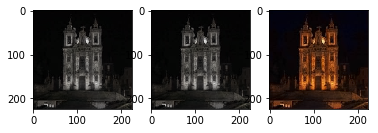

0


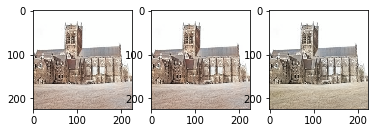

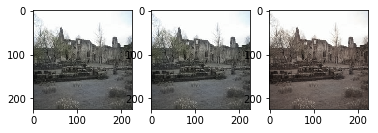

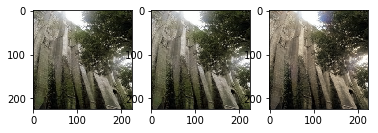

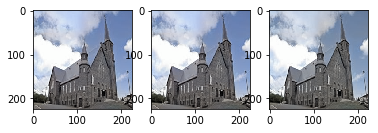

In [27]:
ori_filename_list = []
ori_file_path = "F:/Project_Yang/Database/training_image1000"
index_filename_list = []
index_file_path = "F:/Project_Yang/Database/index_image1000"

for item in os.listdir(ori_file_path):
    path = ori_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        ori_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        ori_filename_list.append(path)

for item in os.listdir(index_file_path):
    path = index_file_path + '/' + item
    if os.path.isdir(path):     # 如果是文件夹
        index_filename_list.extend(get_all_files(path))
    elif os.path.isfile(path):  # 如果是文件
        index_filename_list.append(path)

#for i in range(len(filename_list)):
for i in range(5):
    oriImg = Image.open(ori_filename_list[i])
    orimg = oriImg.load()
    
    inImg = Image.open(index_filename_list[i])
    indexImg = inImg.load()
    
    newImg = Image.new("RGB", size)
    newImg = oriImg
    pnewImg = newImg.load()
    
    plt.subplot(231), plt.imshow(oriImg)
    plt.subplot(232), plt.imshow(newImg)
    plt.subplot(233), plt.imshow(inImg)
    plt.show()
    
    size = inImg.size
    if i % 10000 == 0:
        print(i)
    CreateInputImage(pnewImg, indexImg, size, 'F:/Project_Yang/Database/sparseReplace_image/' + str(i) + '_input.bmp', 
                     'F:/Project_Yang/Database/mask_image/' + str(i) + '_mask.bmp')